In [ ]:
import numpy as np


In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM

template = """Question: {question}

Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)

model = OllamaLLM(model="llama3.2")

chain = prompt | model

chain.invoke({"question": "What is LangChain?"})

In [ ]:
for chank in chain.stream({"question": "What is LangChain?"}):
    print(chank, end="", flush=True)

### Text Postive or Negative

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
model = OllamaLLM(model="llama3.2", max_tokens=5, temperature=0.0, top_p=0.9)

In [ ]:
def is_positive(text,model):
    template = """ text: {text}
    check is this text positive or negative and reply only `positive` or `negative`"""
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model
    return chain.invoke({"text": text})
    

In [ ]:
is_positive("new car for sale",model)

In [ ]:
def is_suitable_text(text, model):
    template = """
    Given the following text:
    "{text}"
    Please check if the Text contains any offensive or inappropriate language (bad words) or has a not resspectful tone and reply only with `suitable` or `not suitable`.
    """
    prompt = ChatPromptTemplate.from_template(template.strip())
    chain = prompt | model
    return True if chain.invoke({"text": text}).lower() == "suitable" else False

is_suitable_text("new car for sale",model)

In [ ]:
is_suitable_text("hate",model)

### Title and description constancy

In [ ]:
def is_titleDescription_consistent(title, description, model):
    template = """
    Given the following title and description:
    Title: {title}
    Description: {description}
    
    please check if the title and description are in same context and related to each other and reply with `consistent` or `not consistent`.
    """
    
    prompt = ChatPromptTemplate.from_template(template.strip())
    chain = prompt | model
    return chain.invoke({"title": title, "description": description})

# Example usage:
is_titleDescription_consistent("new car", "new cat for sale", model)


In [ ]:
is_titleDescription_consistent(" car for sale", "a good car with a new wheels", model)

In [ ]:
def is_titleDescription_consistent(title, description, model):
    template = """
    Given the following title and description for a same product on am e-commerce website:
    Title: {title}
    Description: {description}
    now check if the title and description are in same context and related to each other, 
    and reply only with `consistent` or `not consistent`.
    """
    
    prompt = ChatPromptTemplate.from_template(template)
    chain = prompt | model
    return True if chain.invoke({"title": title, "description": description}).lower() == "consistent" else False

is_titleDescription_consistent("new car", " old car for sale", model)


### Image and title constancy

In [2]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
vison_model = OllamaLLM(model="llama3.2-vision", max_tokens=1, temperature=0.0, top_p=0.9)

In [ ]:
import base64
from IPython.display import HTML, display

def encode_image(image_file):
    try:
        if isinstance(image_file, str):
            # If image_file is a file path
            with open(image_file, "rb") as file:
                encoded_string = base64.b64encode(file.read()).decode("utf-8")
        else:
            # If image_file is a file-like object
            encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
        return encoded_string
    except Exception as e:
        # Handle exceptions such as file not found or read errors
        print(f"An error occurred while encoding the image: {e}")
        return None
    

def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" ,,/>'
    # Display the image by rendering the HTML
    display(HTML(image_html))


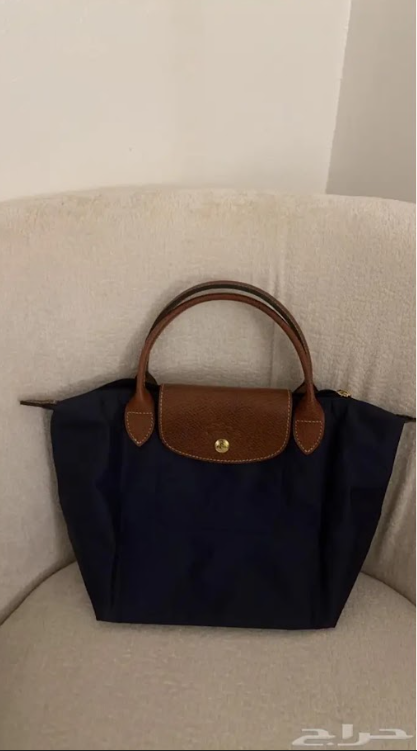

In [5]:
image_path = "C:/Users/ziad.abdlhamed/OneDrive - Giza Systems/Desktop/Screenshot 2024-11-05 165314.png"
encoded_image = encode_image(image_path)
plt_img_base64(encoded_image)

In [ ]:
def is_imageTitle_consistent(image, title, model):
    llm_with_image_context = model.bind(images=[image])
    return llm_with_image_context.invoke("what is this image about?")




In [ ]:
is_imageTitle_consistent(encoded_image, "A car", vison_model)


In [ ]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
import pprint

# Initialize the model
llm = ChatOllama(model="llama3.2-vision", temperature=0, max_tokens=3, top_p=0.9,)

# Define the function to check image-title consistency
def is_imageTitle_consistent(image, title, model):
    # Prepare the image part (base64 encoded image)
    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    # Prepare the text part (title)
    text_part = {"type": "text", "text": title}

    # Combine both image and title into content parts
    content_parts = [image_part, text_part]

    # Create a prompt to check if the image and title are related or consistent
    prompt_func = lambda data: [HumanMessage(content=content_parts)]

    # Chain the prompt with the model
    chain = prompt_func | model | StrOutputParser()

    # Invoke the chain with title and image
    query_chain = chain.invoke({"text": title, "image": image})

    # Return the output
    return query_chain


# Example usage:
title = "new car for sale"
image_path = "C:/Users/ziad.abdlhamed/OneDrive - Giza Systems/Desktop/Screenshot 2024-11-05 165314.png"
image_b64 = encode_image(image_path)

# Call the function
result = is_imageTitle_consistent(image_b64, title, llm)
pprint.pprint(result)


In [15]:
from langchain_core.messages import HumanMessage
def extract_text_from_image(base64_image,model ,prompt=None):
    if prompt is None:
        prompt = (
            "what is this image about?"
        )
    messages = [
        HumanMessage(content=[
            {
                "type": "image_url",
                "image_url": f"data:image/jpeg;base64,{base64_image}",
            },
            {"type": "text", "text": prompt},
        ]),
    ]
    return model.invoke(messages)

In [16]:
extract_text_from_image(encoded_image,vison_model)

'This appears to be a JSON object containing an image and a text prompt. The image itself is not directly visible, but the text prompt is: "what is this image about?"\n\nIf I were to guess, I\'d say that this is likely a test or example data for some kind of AI model or chatbot, where the model is expected to analyze the image (which is not actually provided here) and respond with an answer to the text prompt.\n\nHowever, without the actual image, it\'s impossible for me to provide a meaningful response. If you\'d like to share the image itself, I\'d be happy to try and help!'

In [17]:
from langchain_core.messages import HumanMessage

def extract_text_from_image(base64_image, model, prompt=None):
    # Default prompt if none is provided
    if prompt is None:
        prompt = "What is this image about?"

    # Constructing the message for the model
    messages = [
        HumanMessage(content=[
            {
                "type": "image_url",
                "image_url": f"data:image/jpeg;base64,{base64_image}",
            },
            {"type": "text", "text": prompt},
        ]),
    ]
    
    # Invoke the model with the constructed messages
    response = model.invoke(messages)

    # Return the response, this can be customized depending on the model output format
    return response

# Example usage:
image_path = "C:/Users/ziad.abdlhamed/OneDrive - Giza Systems/Desktop/Screenshot 2024-11-05 165314.png"
encoded_image = encode_image(image_path)
response=extract_text_from_image(encoded_image, vison_model)
print(response)


It looks like you've provided a JSON object containing an image and some text. However, I'm unable to directly view or interpret the image data.

But I can try to help with the text part!

The text says: "What is this image about?"

Is that what you'd like me to assist with?


In [1]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2-vision", temperature=0, max_tokens=3, top_p=0.9)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


chain = prompt_func | llm 

# # for chank in chain.stream({"text": "what is the image about?", "image": encoded_image}):
# #     print(chank, end="", flush=True)

# response=chain.invoke({"text": "what is the image about?", "image": encoded_image})
# print(response.content)


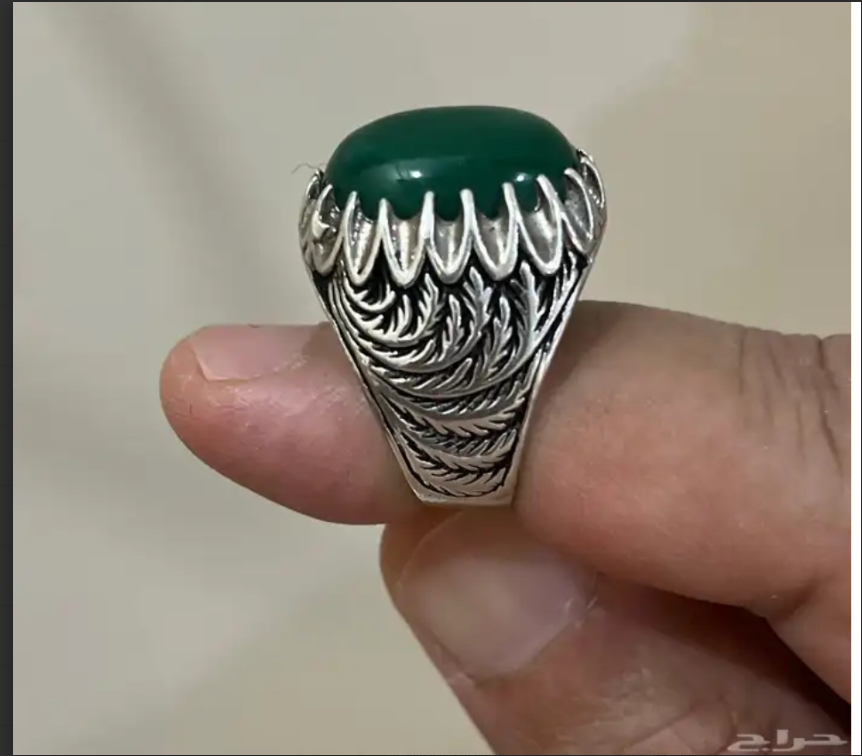

Yes, the image appears to have a watermark in the bottom-right corner. The watermark is written in Arabic and reads "a.j."


In [11]:
image_path = "C:/Users/ziad.abdlhamed/OneDrive - Giza Systems/Desktop/Screenshot 2024-11-05 201910.png"
encoded_image = encode_image(image_path)
plt_img_base64(encoded_image)
response=chain.invoke({"text": "is image has a water mark", "image": encoded_image})
print(response.content)